In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math
import random
time=[]
for i in range(-1,10000):
    time.append(i)

In [3]:
class reciever:
    def __init__(self, id,radar,aircraft):
        self.id = id                                       # Id of the reciever
        self.pri = radar.pri                               # Pulse Repetition Interval
        self.pwd = radar.pwd                               # Pulse Width
        self.R = math.dist(radar.pos,aircraft.pos)         # Distance between the radar and the aircraft
        self.Pt=radar.Pt                                   # Peak transmitted power
        self.G=radar.G                                     # Antenna Gain
        self.P=(self.Pt*self.G)/(4*math.pi*(self.R**2))    # Power recieved by the aircraft radar reciver
        self.pulse_train=[[],[],[],[]]                     # we are producing the pulse train for the 4 recievers
                                                           # front left, rear left, rear right and front right respectively
                                                           # based on the above information
        angle=math.degrees(math.atan2(radar.pos[1]-aircraft.pos[1],radar.pos[0]-aircraft.pos[0]))-aircraft.heading
        if(angle>360):
            angle-=360                                     # Angle between the aircraft and radar
        if(angle<-360):
            angle+=360
        if(angle>180):
            angle-=360
        if(angle<-180):
            angle+=360
        self.angle=angle
        for i in range(-1,10000):
            if(i%self.pri<=self.pwd):
                if(angle>=-45 and angle<=135):
                    self.pulse_train[0].append(abs(self.P*math.cos(math.radians(angle-45))))
                else:
                    self.pulse_train[0].append(0)
                if ((angle>=45 and angle<=180) or (angle>=-180 and angle<=-135)):
                    self.pulse_train[1].append(abs(self.P*math.cos(math.radians(angle-135))))
                else:
                    self.pulse_train[1].append(0)
                if ((angle>=135 and angle<=180) or (angle>=-180 and angle<=-45)):
                    self.pulse_train[2].append(abs(self.P*math.cos(math.radians(angle+135))))
                else:
                    self.pulse_train[2].append(0)
                if (angle>=-135 and angle<=45):
                    self.pulse_train[3].append(abs(self.P*math.cos(math.radians(angle+45))))
                else:
                    self.pulse_train[3].append(0)
            else:
                self.pulse_train[0].append(0)
                self.pulse_train[1].append(0)
                self.pulse_train[2].append(0)
                self.pulse_train[3].append(0)

class radar:
    def __init__(self, id,pri=500,pwd=10,pos=(0,0)):
        self.id = id                                       # Id of the radar
        self.pri = pri                                     # Pulse Repetition Interval
        self.pwd = pwd                                     # Pulse Width
        self.Pt=10                                         # Peak transmitted power
        self.G=1                                           # Antenna Gain
        self.pos = pos    

class aircraft:
    def __init__(self, id,pos=(0,0),heading=0):
        self.id = id                                       # Id of the Aircraft
        self.pos = pos                                     # Position of the radar
        self.heading = heading                             # heading of the Aircraft in degrees

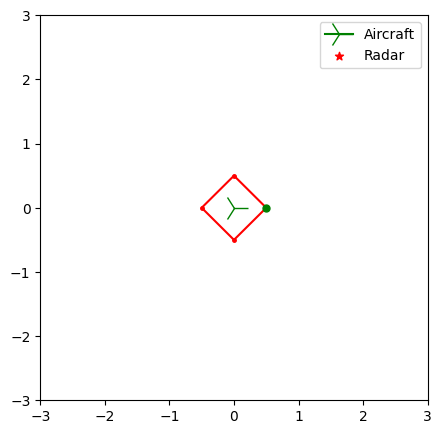

Front Left


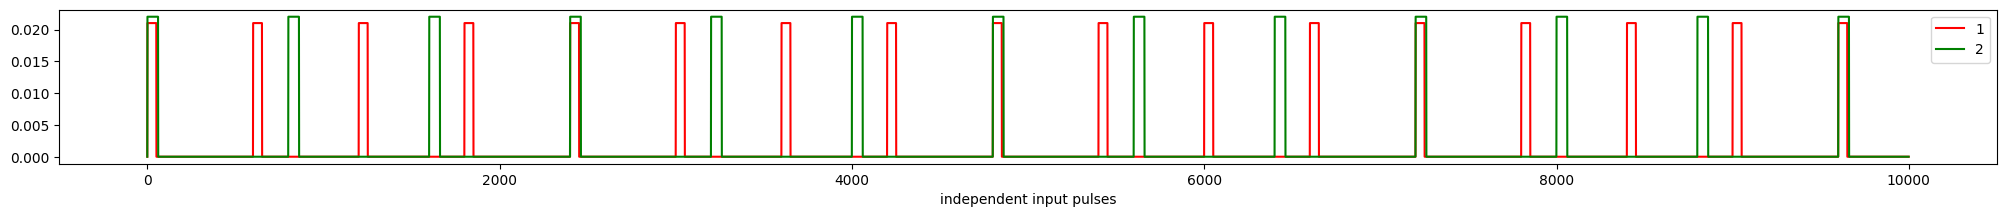

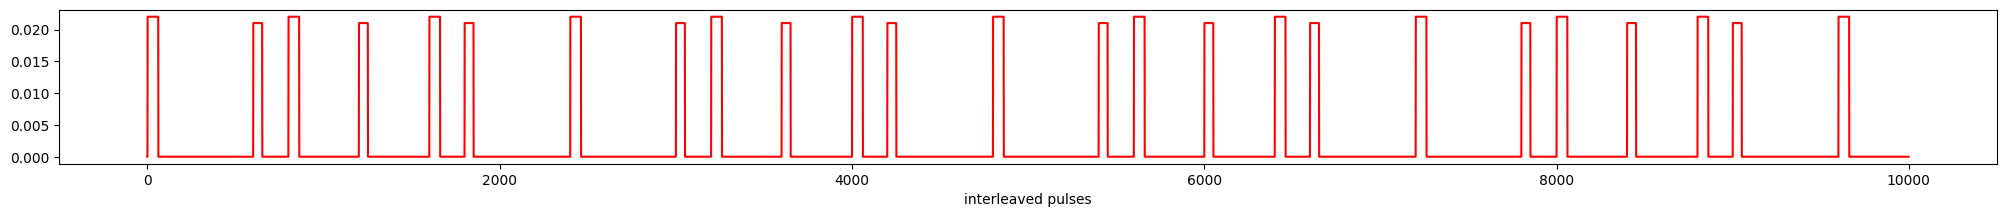

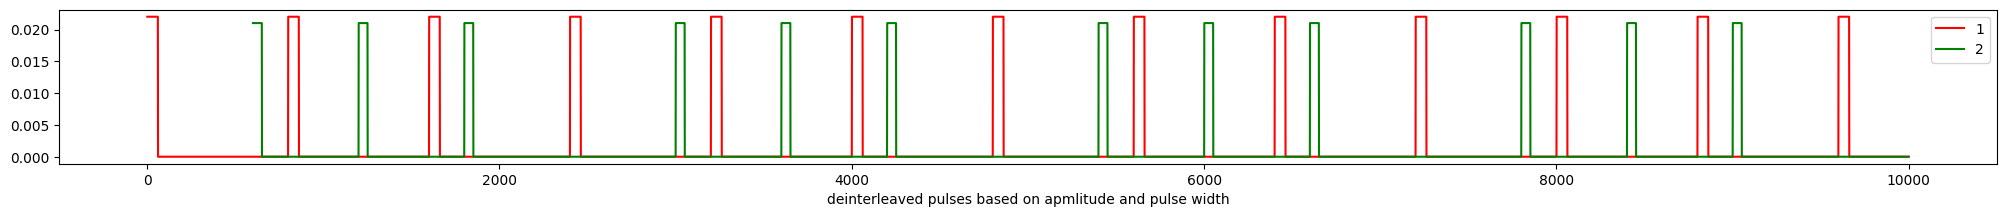

Rear Left


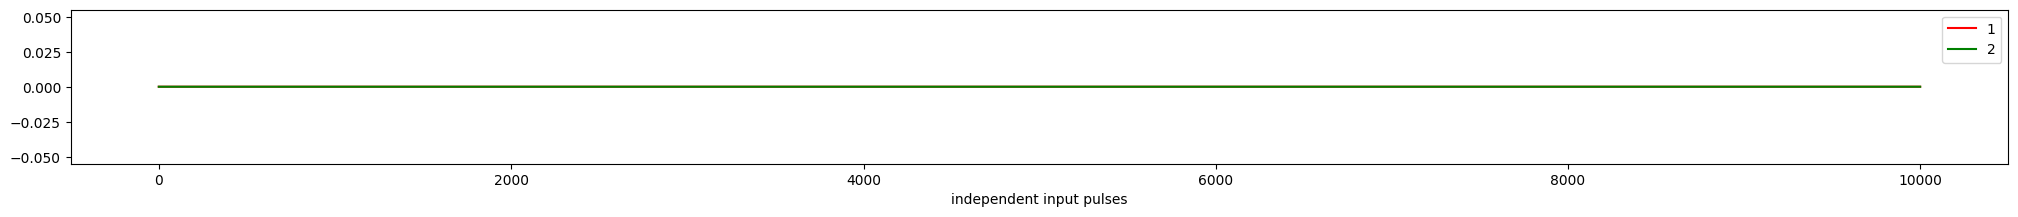

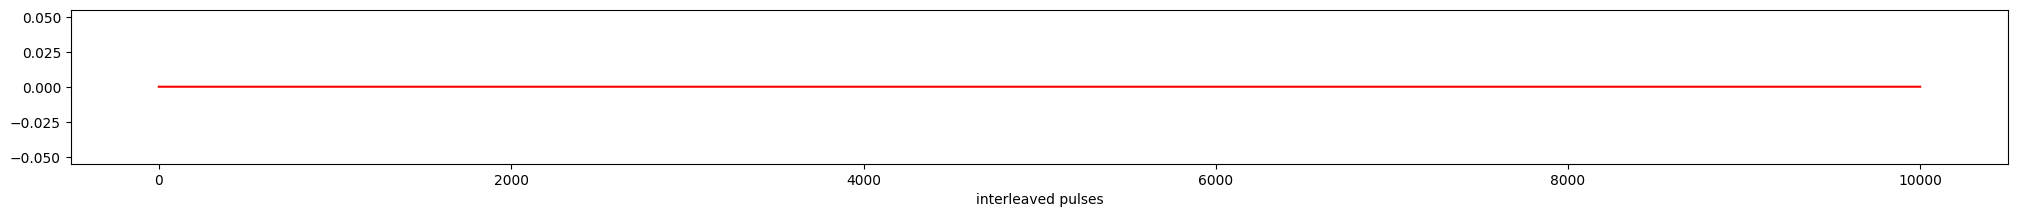

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


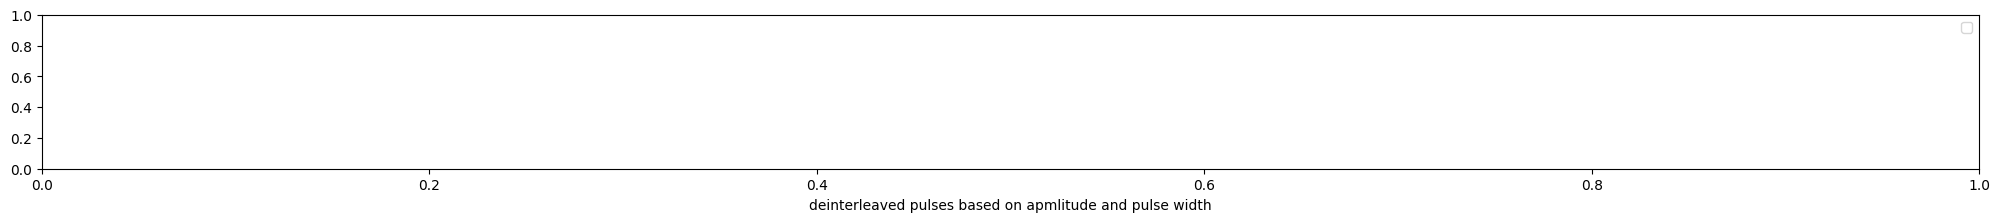

Rear Right


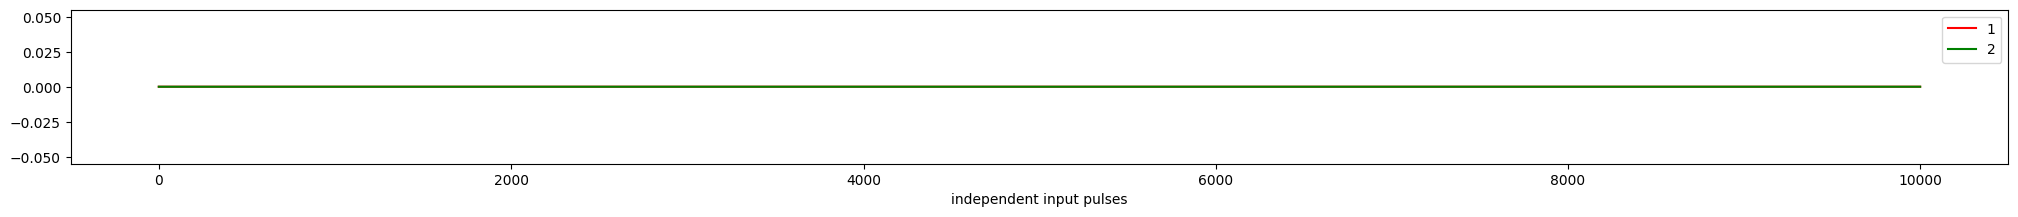

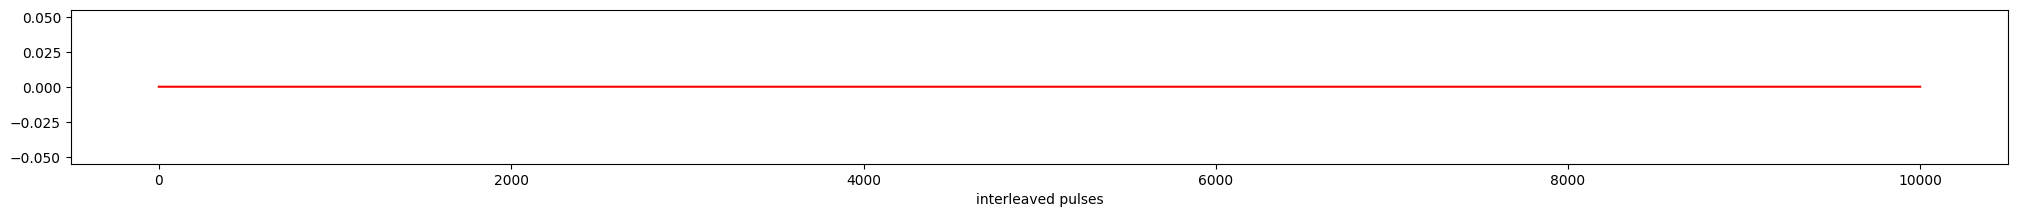

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


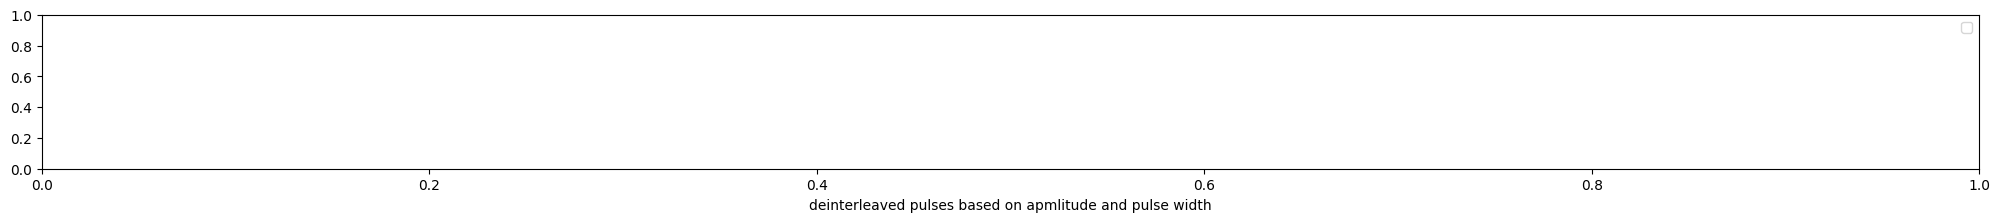

Front Right


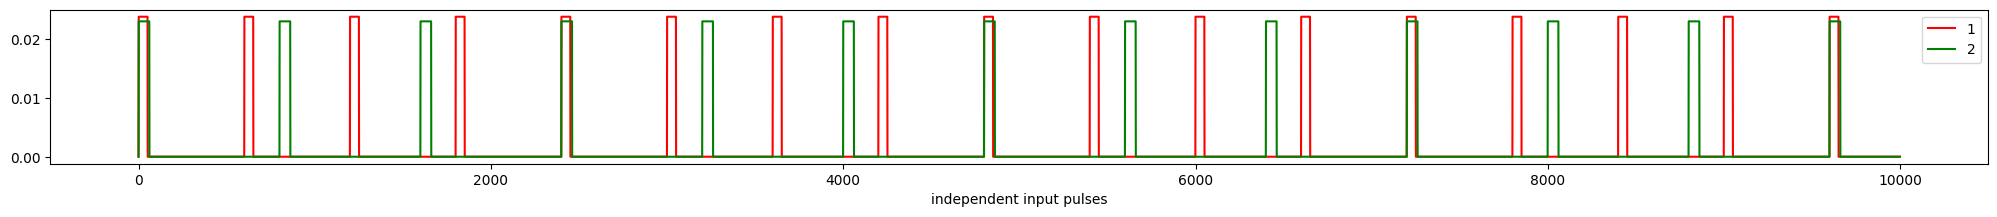

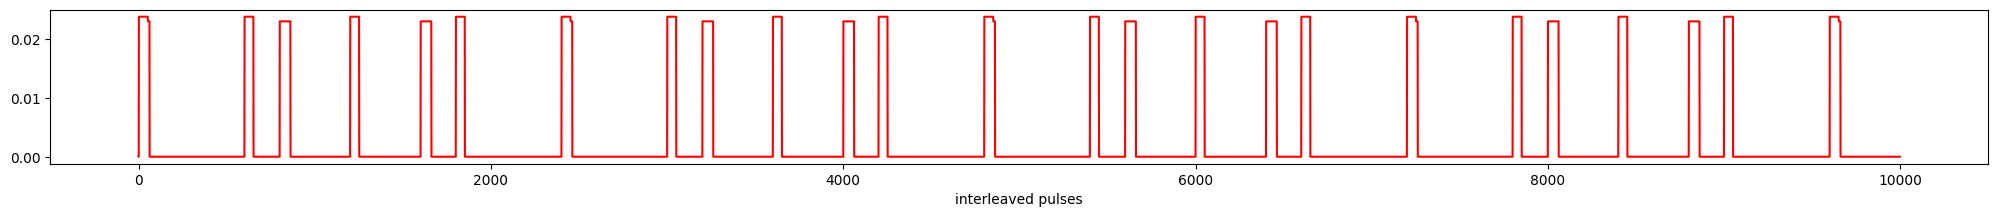

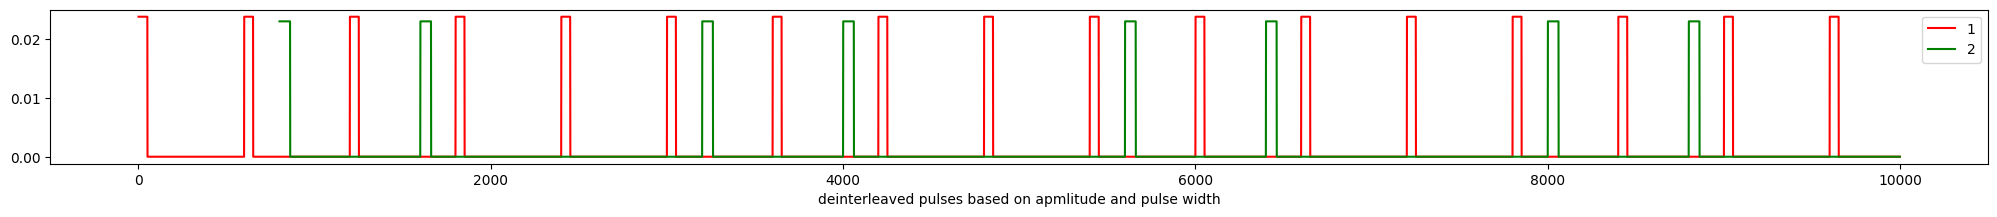

In [5]:
# radar_positions = np.array([
#     (1,0),
#     (1,1),
#     (-2,-1),
#     (0.3,1.5)
# ])

radar_positions = np.array([
    (0,1),
    (-1,0),
    (0,-1),
    (1,0)
])

radar_positions = np.array([
    (5,-0.3),
    (5,-0.1),
    # (-1,-1),
    # (1,-1),
])

# radar_positions = np.array([
#     (random.uniform(1,2) if random.uniform(-1,1)>0 else random.uniform(-1,-2),random.uniform(1,2) if random.uniform(-1,1)>0 else random.uniform(-1,-2)),
#     (random.uniform(1,2) if random.uniform(-1,1)>0 else random.uniform(-1,-2),random.uniform(1,2) if random.uniform(-1,1)>0 else random.uniform(-1,-2)),
#     # (random.uniform(1,2) if random.uniform(-1,1)>0 else random.uniform(-1,-2),random.uniform(1,2) if random.uniform(-1,1)>0 else random.uniform(-1,-2)),
#     # (random.uniform(1,2) if random.uniform(-1,1)>0 else random.uniform(-1,-2),random.uniform(1,2) if random.uniform(-1,1)>0 else random.uniform(-1,-2))
# ])

aircraft_0 = aircraft(id=0,pos=(0,0),heading=0)
# aircraft_0 = aircraft(id=0,pos=(random.uniform(-1,1),random.uniform(-1,1)),heading=random.uniform(0,360))

radars=[]
pulses=[[],# Pulse recieved By the front left reciever
        [],# Pulse recieved By the rear left reciever
        [],# Pulse recieved By the rear right reciever
        []]# Pulse recieved By the front right reciever
radar_0 = radar(id=0,pri=600,pwd=50,pos=radar_positions[0])
pulse_0 = reciever(id=0,radar=radar_0,aircraft=aircraft_0)
radars.append(radar_0)
pulses[0].append(pulse_0.pulse_train[0])
pulses[1].append(pulse_0.pulse_train[1])
pulses[2].append(pulse_0.pulse_train[2])
pulses[3].append(pulse_0.pulse_train[3])

radar_1 = radar(id=1,pri=800,pwd=60,pos=radar_positions[1])
radars.append(radar_1)
pulse_1 = reciever(id=1,radar=radar_1,aircraft=aircraft_0)
pulses[0].append(pulse_1.pulse_train[0])
pulses[1].append(pulse_1.pulse_train[1])
pulses[2].append(pulse_1.pulse_train[2])
pulses[3].append(pulse_1.pulse_train[3])

# radar_2 = radar(id=2,pri=1000,pwd=100,pos=radar_positions[2])
# radars.append(radar_2)
# pulse_2 = reciever(id=2,radar=radar_2,aircraft=aircraft_0)
# pulses[0].append(pulse_2.pulse_train[0])
# pulses[1].append(pulse_2.pulse_train[1])
# pulses[2].append(pulse_2.pulse_train[2])
# pulses[3].append(pulse_2.pulse_train[3])

# radar_3 = radar(id=3,pri=2300,pwd=30,pos=radar_positions[3])
# radars.append(radar_3)
# pulse_3 = reciever(id=3,radar=radar_3,aircraft=aircraft_0)
# pulses[0].append(pulse_3.pulse_train[0])
# pulses[1].append(pulse_3.pulse_train[1])
# pulses[2].append(pulse_3.pulse_train[2])
# pulses[3].append(pulse_3.pulse_train[3])

plt.figure(figsize=(5 , 5))
plt.plot(aircraft_0.pos[0],aircraft_0.pos[1], color='g', marker = '4', markersize=20,label='Aircraft')
tmp_s=0.5
tmp_x=[aircraft_0.pos[0]+(tmp_s*math.cos(math.radians(aircraft_0.heading))),
       aircraft_0.pos[0]+(tmp_s*math.cos(math.radians(aircraft_0.heading+90))),
       aircraft_0.pos[0]+(tmp_s*math.cos(math.radians(aircraft_0.heading+180))),
       aircraft_0.pos[0]+(tmp_s*math.cos(math.radians(aircraft_0.heading-90))),
       aircraft_0.pos[0]+(tmp_s*math.cos(math.radians(aircraft_0.heading)))]
tmp_y=[aircraft_0.pos[1]+(tmp_s*math.sin(math.radians(aircraft_0.heading))),
       aircraft_0.pos[1]+(tmp_s*math.sin(math.radians(aircraft_0.heading+90))),
       aircraft_0.pos[1]+(tmp_s*math.sin(math.radians(aircraft_0.heading+180))),
       aircraft_0.pos[1]+(tmp_s*math.sin(math.radians(aircraft_0.heading-90))),
       aircraft_0.pos[1]+(tmp_s*math.sin(math.radians(aircraft_0.heading)))]
plt.plot(tmp_x,tmp_y, color='r', marker = '.', markersize=5)
plt.plot(tmp_x[0],tmp_y[0], color='g', marker = '.', markersize=10)
plt.scatter(radar_positions[:,0],radar_positions[:,1], color='r', marker = '*',label='Radar')
plt.legend()
rng=3
plt.xlim([-rng, rng])
plt.ylim([-rng, rng])
plt.show()

print('Front Left')
deinterleave(pulses[0])
print('Rear Left')
deinterleave(pulses[1])
print('Rear Right')
deinterleave(pulses[2])
print('Front Right')
deinterleave(pulses[3])

## Backend Code for deinterleaving the pulse train

In [4]:
def deinterleave(pulses):    
    ci=0#len(time)//4
    cf=len(time)//1
    clrs= 'rgbcmyk'
    fig_x , fig_y = 25 , 2
    plt.figure(figsize=(fig_x , fig_y))
    idx=0
    for i in pulses:
        idx+=1
        plt.plot(time[ci:cf],i[ci:cf], color=clrs[idx-1], label=str(idx))
    plt.legend()
    plt.xlabel("independent input pulses")
    plt.show()

    pulse_f=[[],[],[],[]]
    for i in time:
        max_t=[]
        for j in pulses:
            max_t.append(j[i])
        pulse_f[0].append(max(max_t))
    plt.figure(figsize=(fig_x , fig_y))
    plt.plot(time[ci:cf],pulse_f[0][ci:cf], color='r')
    plt.xlabel("interleaved pulses")
    plt.show()

    # deinterleaved_pulses={}
    # for i in pulse_f[0]:
    #     if i!=0:
    #         if(i not in deinterleaved_pulses):
    #             deinterleaved_pulses[i]=[]
    #     for j in list(deinterleaved_pulses.keys()):
    #         if j==i:
    #             deinterleaved_pulses[j].append(i)
    #         else:
    #             deinterleaved_pulses[j].append(0)

    # plt.figure(figsize=(fig_x , fig_y))
    # idx=0
    # for i in list(deinterleaved_pulses.values()):
    #     idx+=1
    #     plt.plot(time[(cf-len(i[ci:cf])):cf],i[ci:cf], color=clrs[idx-1], label=str(idx))
    # plt.legend()
    # plt.xlabel("deinterleaved pulses based on apmlitude")
    # plt.show()

    deinterleaved_pulses={}
    pwd_counter = 0
    pwd_counter_before = 0
    pwd_counter_after = 0
    pwd_value = 0
    lead_edge=False
    fall_edge=False
    pwd_set=set()
    idx=0
    for i in pulse_f[0]:
        idx+=1
        if(i!=0):
            if(pwd_value==0):
                pwd_value=i
                lead_edge=True
            if(pwd_value!=i):
                if(i<pwd_value):
                    lead_edge=False
                    pwd_counter_after+=1
                else:
                    pwd_value=i
                    lead_edge=True
                    pwd_counter_before=pwd_counter
                    pwd_counter=0
            if(lead_edge):
                pwd_counter+=1
            fall_edge=True
        else:
            if(fall_edge):
                flg=True
                for l in list(deinterleaved_pulses.keys()):
                    if(l[0]==pwd_value and l[1]==pwd_counter-1):
                        flg=False
                if flg:
                    deinterleaved_pulses[(pwd_value,pwd_counter-1)]=[]
                for j in list(deinterleaved_pulses.keys()):
                    if(j==(pwd_value,pwd_counter-1)):
                        for k in range(pwd_counter_before):
                            deinterleaved_pulses[j].append(0)
                        for k in range(pwd_counter):
                            deinterleaved_pulses[j].append(pwd_value)
                        for k in range(pwd_counter_after):
                            deinterleaved_pulses[j].append(0)
                    else:
                        for k in range(pwd_counter_before):
                            deinterleaved_pulses[j].append(0)
                        for k in range(pwd_counter):
                            deinterleaved_pulses[j].append(0)
                        for k in range(pwd_counter_after):
                            deinterleaved_pulses[j].append(0)
            lead_edge=False
            fall_edge=False
            pwd_value=0
            pwd_counter=0
            pwd_counter_before=0
            pwd_counter_after=0
            for j in deinterleaved_pulses.values():
                j.append(0)

    plt.figure(figsize=(fig_x , fig_y))
    idx=0
    for i in list(deinterleaved_pulses.values()):
        idx+=1
        plt.plot(time[(cf-len(i[ci:cf])):cf],i[ci:cf], color=clrs[idx-1], label=str(idx))
    plt.legend()
    plt.xlabel("deinterleaved pulses based on apmlitude and pulse width")
    plt.show()